In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [14]:
breast_cancer_dataset = load_breast_cancer()
breast_cancer = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)
breast_cancer['result'] = breast_cancer_dataset['target']

# Split the dataset into features (X) and target (y)
X = breast_cancer.drop(columns=['result'])
y = breast_cancer['result']

In [15]:
# Splitting the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
#X_train_scaled

In [26]:
# Logistic Regression implementation
def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    return (sigmoid(z) >= 0.5).astype(int)
    
#def train_log_reg(X, y, learning_rate=0.01, num_iterations=755):
#    m, n = X.shape
#    weights = np.zeros(n)
#    bias = 0
#
#    for _ in range(num_iterations):
#        z = np.dot(X, weights) + bias
#        predictions = sigmoid(z)
#        gradient_weights = np.dot(X.T, (predictions - y)) / m
#        gradient_bias = np.sum(predictions - y) / m
#        weights -= learning_rate * gradient_weights
#        bias -= learning_rate * gradient_bias
#
#    return weights, bias
def train_log_reg(X_train, y_train, X_test, y_test, learning_rate=0.01, num_iterations=5):
    m, n = X_train.shape
    weights = np.zeros(n)
    bias = 0
    train_accuracies = []
    test_accuracies = []

    for _ in range(num_iterations):
        z_train = np.dot(X_train, weights) + bias
        predictions_train = sigmoid(z_train)
        gradient_weights = np.dot(X_train.T, (predictions_train - y_train)) / m
        gradient_bias = np.sum(predictions_train - y_train) / m
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias

        # Calculate accuracy on the training set
        y_pred_train = predict(X_train, weights, bias)
        train_accuracy = accuracy_score(y_train, y_pred_train)
        train_accuracies.append(train_accuracy)

        # Calculate accuracy on the testing set
        y_pred_test = predict(X_test, weights, bias)
        test_accuracy = accuracy_score(y_test, y_pred_test)
        test_accuracies.append(test_accuracy)

    return weights, bias, train_accuracies, test_accuracies

In [27]:
# Train the model
weights, bias, train_accuracies, test_accuracies = train_log_reg(X_train_scaled, y_train, X_test_scaled, y_test)

# Predictions on test set
y_pred_test = predict(X_test_scaled, weights, bias)
print(y_pred_test)

#Prediction on train set
y_pred_train = predict(X_train, weights, bias)

[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1]


In [28]:
def evaluate_model(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return cm, sensitivity, specificity

cm_train, sensitivity_train, specificity_train = evaluate_model(y_train, y_pred_train)
cm_test, sensitivity_test, specificity_test = evaluate_model(y_test, y_pred_test)

print("Confusion Matrix (Training):\n", cm_train)
print("Sensitivity (Training):", sensitivity_train)
print("Specificity (Training):", specificity_train)

print("Confusion Matrix (Testing):\n", cm_test)
print("Sensitivity (Testing):", sensitivity_test)
print("Specificity (Testing):", specificity_test)

Confusion Matrix (Training):
 [[149   0]
 [249   0]]
Sensitivity (Training): 0.0
Specificity (Training): 1.0
Confusion Matrix (Testing):
 [[ 62   1]
 [  2 106]]
Sensitivity (Testing): 0.9814814814814815
Specificity (Testing): 0.9841269841269841


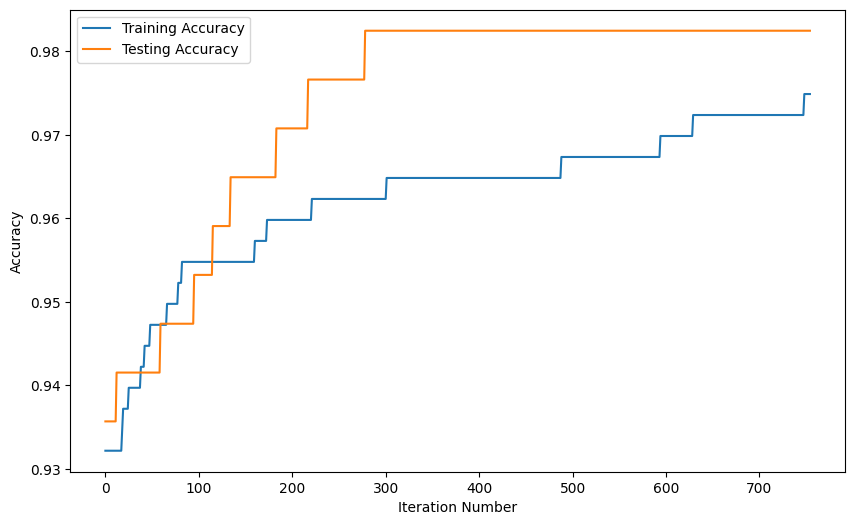

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Testing Accuracy')
plt.xlabel('Iteration Number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()